## The Data

We will be using data from a Kaggle data set for Home Sales:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Imports and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../DATA/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Exploring the Data

** First we will check for missing data **

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

** Some info on the data **

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


** Distribution plot for house sold prices **

In [7]:
sns.set_style('darkgrid')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


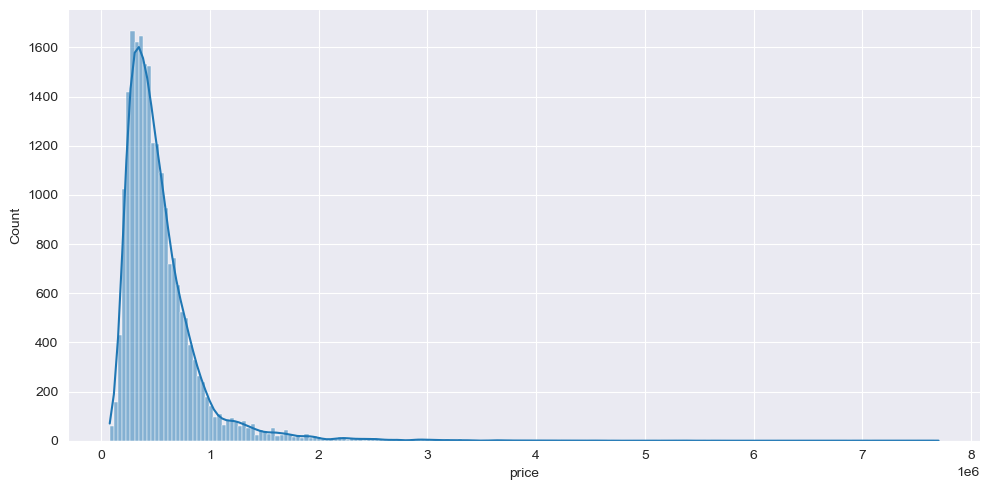

In [8]:
sns.displot(df['price'], aspect = 2, bins = 200, kde= True)

We observe most house prices to be up to 2 millions with some rare cases that can reach up to 7.5-8 millions. Since there are very few houses on the market that are so expensive, it may not be that useful to train our model to these extreme outliers.

** A countplot of the number of bedrooms in the houses **

<Axes: xlabel='bedrooms', ylabel='count'>

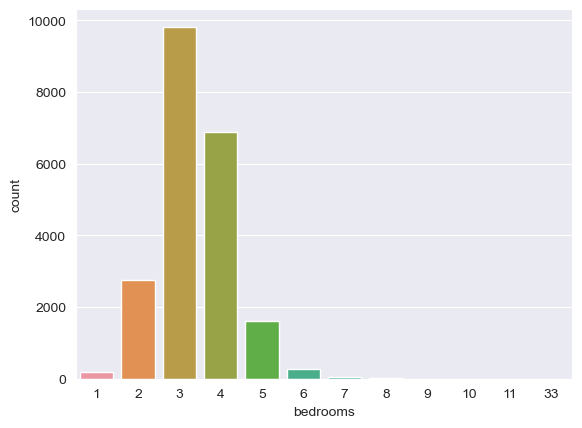

In [9]:
sns.countplot(df, x= 'bedrooms')

Most of the houses have 2 to 5 bedrooms. There are a few with more and a highly rare house with 33 bedrooms (Notice the count are up to thousands of houses, so the numbers showing up after 7 are very few but they exist in the dataset)

** We will check the correlation of the label we want to predict with the other features **

In [10]:
df.corr(numeric_only= True)['price'].sort_values(ascending= False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

**Based on this, we will explore some of the highly correlated ones**

** Scatterplot of the price and square footage of the interior living space **

<Axes: xlabel='price', ylabel='sqft_living'>

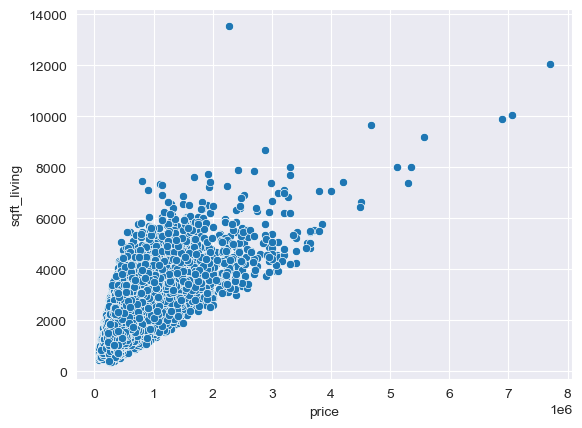

In [11]:
sns.scatterplot(df, x= 'price', y='sqft_living')

As we would have expected, we see a strong linear relationship between price and square footage.

** Boxplot of the price and number of bedrooms **

<Axes: xlabel='bedrooms', ylabel='price'>

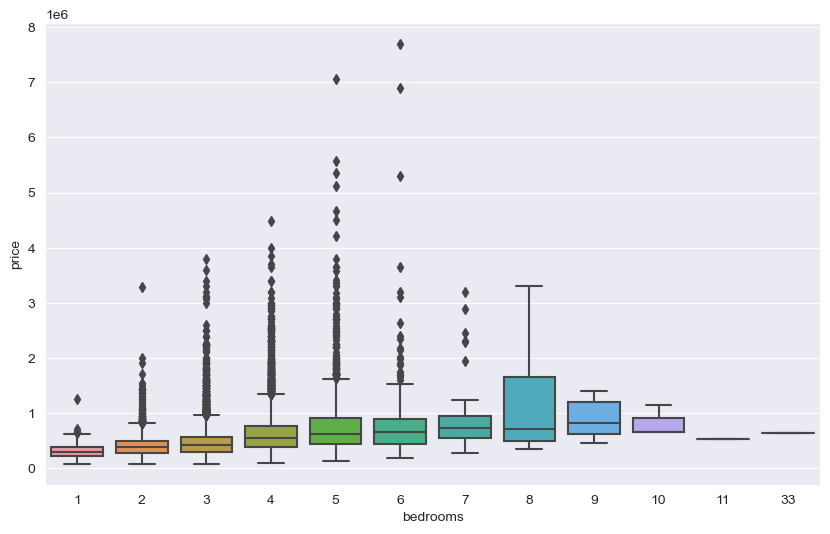

In [12]:
plt.figure(figsize= (10,6))
sns.boxplot(df, x= 'bedrooms', y= 'price')

## Geographical Properties

<Axes: xlabel='price', ylabel='long'>

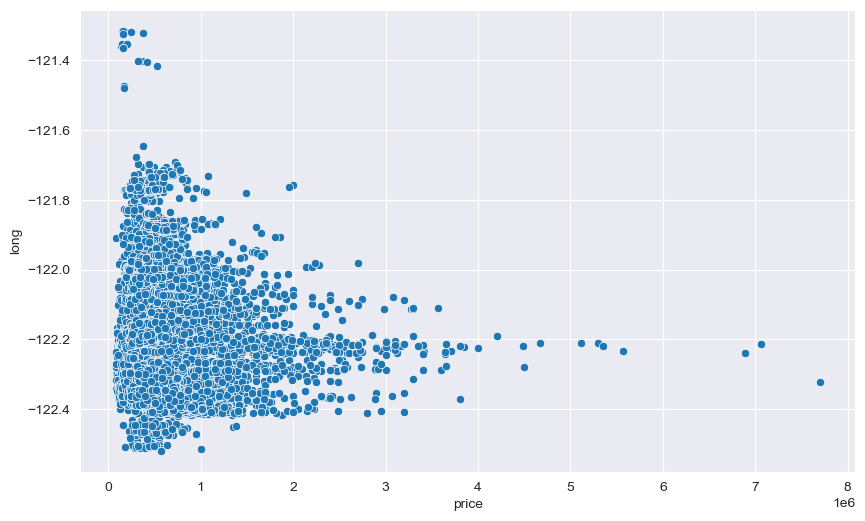

In [13]:
plt.figure(figsize= (10,6))
sns.scatterplot(df, x= 'price', y= 'long')

<Axes: xlabel='price', ylabel='lat'>

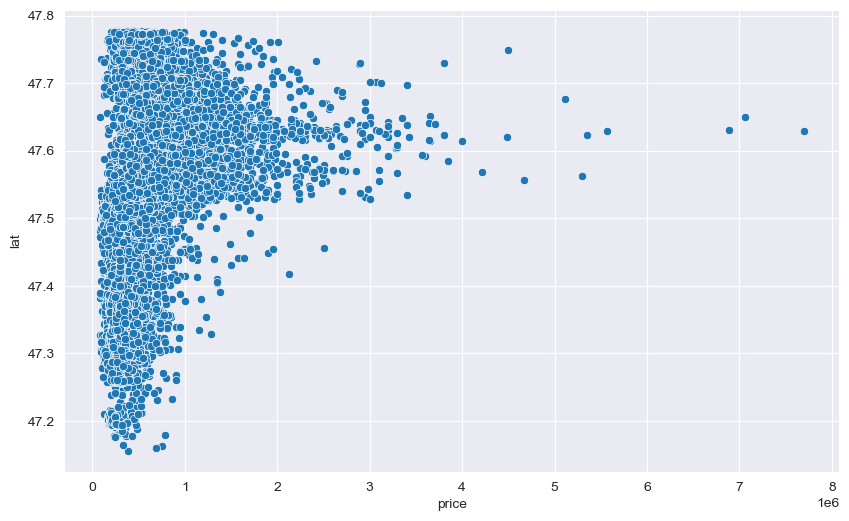

In [14]:
plt.figure(figsize= (10,6))
sns.scatterplot(df, x= 'price', y= 'lat')

We observe the richest geographical area is approximately at 47.6 lat and -122.2 long. We can see this of a map and find the area

** Scatterplot of longtitude and latitude of all houses **

<Axes: xlabel='long', ylabel='lat'>

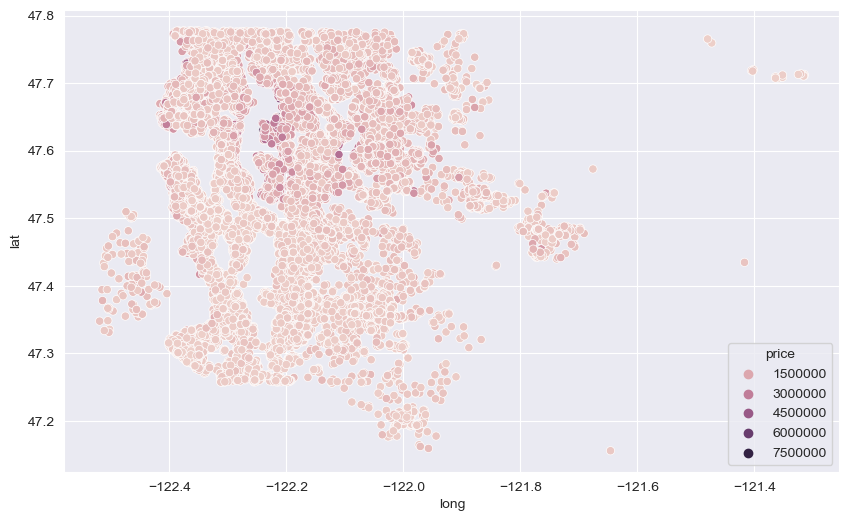

In [15]:
plt.figure(figsize= (10,6))
sns.scatterplot(df, x= 'long', y= 'lat', hue= 'price')

We observe again here the expensive area to be around 47.6 latitude and -122.2 longtitude, but it's not quite clear in color gradient because of the hugely expensive outlier existing in the dataset.

** So we search for the top 25 most expensive houses in the dataset **

In [16]:
df['price'].sort_values(ascending= False).head(25)

7245     7700000.0
3910     7060000.0
9245     6890000.0
4407     5570000.0
1446     5350000.0
1313     5300000.0
1162     5110000.0
8085     4670000.0
2624     4500000.0
8629     4490000.0
12358    4210000.0
4145     4000000.0
2083     3850000.0
7028     3800000.0
19002    3800000.0
16288    3710000.0
18467    3650000.0
6502     3650000.0
15241    3640000.0
19133    3640000.0
2862     3600000.0
21560    3570000.0
5874     3420000.0
10435    3400000.0
13954    3400000.0
Name: price, dtype: float64

In [17]:
len(df)*0.01

215.97

** We will exclude the 1% of the most expensive houses and create the same scatterplot again **

In [18]:
df99 = df.sort_values(ascending= False, by= 'price').iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

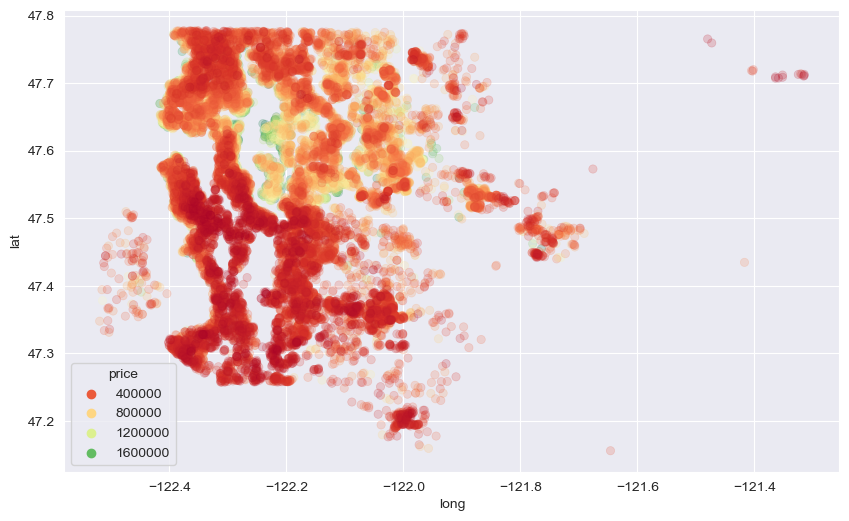

In [19]:
plt.figure(figsize= (10,6))
sns.scatterplot(df99, x= 'long', y='lat', hue= 'price',
                palette='RdYlGn', alpha= 0.2, edgecolor= None)

There we can more easily track the expensive area. 

** Boxplot of the prices for waterfront or not houses **

<Axes: xlabel='waterfront', ylabel='price'>

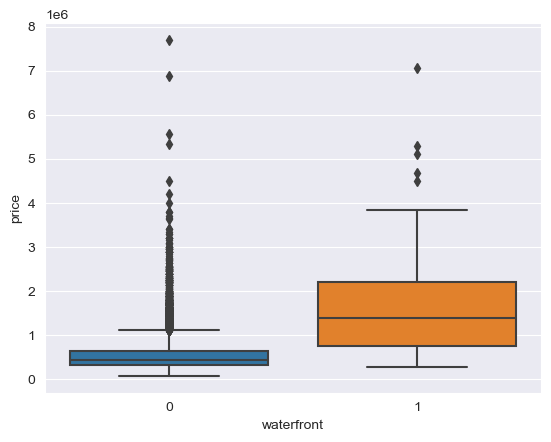

In [20]:
sns.boxplot(df, x= 'waterfront', y= 'price')

Here we can see an obvious distance in the price ranges, in a general notice, for houses being waterfront or not.

## Feature engineering

In [21]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


** First of all the id column does not give us any info about the data so we can drop it **

In [22]:
df = df.drop('id', axis= 1)

** Then we will explore the dates (year and months) and how they affect or not the data **

In [23]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [24]:
df['date'] = pd.to_datetime(df['date'])

In [25]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

We will make two new columns of year and month of the sale and then drop the column date.

In [26]:
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)

In [27]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [28]:
df = df.drop('date', axis= 1)

In [29]:
df['year'].value_counts()

year
2014    14622
2015     6975
Name: count, dtype: int64

We will plot the mean price for every month and the year

<Axes: xlabel='month'>

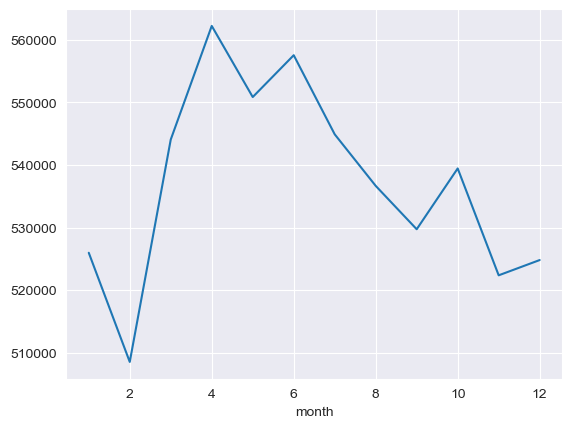

In [30]:
df.groupby('month')['price'].mean().plot()

We observe some diffences on the prices, but we are talking for a difference of 40000 max. So in reality that is not affected a lot from certain months.

<Axes: xlabel='year'>

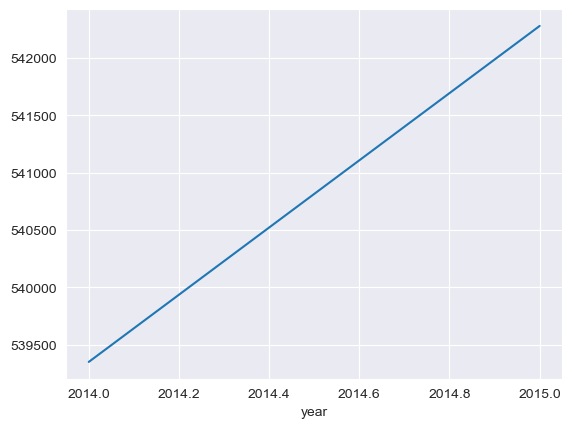

In [31]:
df.groupby('year')['price'].mean().plot()

As we might have expected going through the years, the prices are only going upwards.

** We will explore more columns who might need some adjustments**

In [32]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [33]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


** We will look for sqft_basement **

In [34]:
df['sqft_basement'].value_counts()

sqft_basement
0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

We observe a lot of houses that have no basement. Although for prices we care also how big a basement is also, so we dont have a problem with this column as the higher the number the higher the price.

** Next we will look for year renovated **

In [35]:
df['yr_renovated'].value_counts()

yr_renovated
0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

Lots of things we could do here:
 - the number itself actually can stay the same, since the higher the number the more recent the renovation. Although for houses who havent been renovated and are bulit quite recently this might be unfair.
 - Another option would be to create some evaluation system
 - We could create a new column which would show how many years have passed from when it was built and when it was renovated

For the sake of this project and the fact that this will not be used in reality we will leave this column as it is.

** Up next we will look into the zipcode column **

In [36]:
df['zipcode'].value_counts()

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64

Here we have 70 different zipcodes. To actually use this info to have some validity we probably need to cooperate with someone who knows the particular area and has experience in the domain. Some options we may have (using a map):
 - We could split them into a binary (or more) system, which will indicate if the zipcode matches to an expensive area or not
 - We could split the areas to North, South, West and East supposing that has some meaningfull value for the area

Again for the sake of simplicity for this project, we will drop this column since we do not have much info on the area.

In [37]:
df= df.drop('zipcode', axis= 1)

In [38]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


## Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

In [139]:
#Convert pandas data frames to numpy arrays
#So that it is compatible with Tensorflow
X= df.drop('price', axis= 1).values
y= df['price'].values

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=101)

### Scaling

In [141]:
from sklearn.preprocessing import MinMaxScaler

In [142]:
scaler = MinMaxScaler()

In [143]:
scaler.fit(X_train)

MinMaxScaler()

In [144]:
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

In [145]:
X_test.shape

(6480, 19)

In [146]:
X_train.shape

(15117, 19)

## Creating a Model

In [147]:
from tensorflow.keras.models import Sequential

In [148]:
from tensorflow.keras.layers import Dense

In [149]:
from tensorflow.keras.optimizers import Adam

In [150]:
model = Sequential()

model.add(Dense(19, activation= 'relu'))
model.add(Dense(19, activation= 'relu'))
model.add(Dense(19, activation= 'relu'))
model.add(Dense(19, activation= 'relu'))
model.add(Dense(1))

model.compile(optimizer= 'adam', loss= 'mse')

## Training the Model

In [151]:
model.fit(x= X_train, y= y_train,
          validation_data= (X_test, y_test),
          batch_size= 128, epochs= 400)

Epoch 1/400
119/119 [==============================] - 2s 5ms/step - loss: 430244790272.0000 - val_loss: 418941337600.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 429397639168.0000 - val_loss: 415854526464.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 416351715328.0000 - val_loss: 385578336256.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 350479384576.0000 - val_loss: 277151776768.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 208456548352.0000 - val_loss: 130935758848.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 109130833920.0000 - val_loss: 94870290432.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 97177952256.0000 - val_loss: 93267525632.0000
Epoch 8/400
119/119 [==============================] - 0s 4ms/step - loss: 95573229568.0000 - val_loss: 91794653184.0000
Epoch 9/400
119/119 [

119/119 [==============================] - 0s 4ms/step - loss: 38637080576.0000 - val_loss: 37356806144.0000
Epoch 69/400
119/119 [==============================] - 0s 4ms/step - loss: 38389772288.0000 - val_loss: 37091340288.0000
Epoch 70/400
119/119 [==============================] - 0s 4ms/step - loss: 38167797760.0000 - val_loss: 36873412608.0000
Epoch 71/400
119/119 [==============================] - 0s 3ms/step - loss: 37991309312.0000 - val_loss: 36667588608.0000
Epoch 72/400
119/119 [==============================] - 0s 3ms/step - loss: 37792727040.0000 - val_loss: 36572954624.0000
Epoch 73/400
119/119 [==============================] - 0s 3ms/step - loss: 37611433984.0000 - val_loss: 36288745472.0000
Epoch 74/400
119/119 [==============================] - 0s 3ms/step - loss: 37420912640.0000 - val_loss: 36261842944.0000
Epoch 75/400
119/119 [==============================] - 0s 3ms/step - loss: 37297758208.0000 - val_loss: 35927695360.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 3ms/step - loss: 33070548992.0000 - val_loss: 31555235840.0000
Epoch 136/400
119/119 [==============================] - 0s 3ms/step - loss: 33016662016.0000 - val_loss: 31498084352.0000
Epoch 137/400
119/119 [==============================] - 0s 3ms/step - loss: 32985716736.0000 - val_loss: 31447379968.0000
Epoch 138/400
119/119 [==============================] - 0s 3ms/step - loss: 32935002112.0000 - val_loss: 31400833024.0000
Epoch 139/400
119/119 [==============================] - 0s 3ms/step - loss: 32902672384.0000 - val_loss: 31393206272.0000
Epoch 140/400
119/119 [==============================] - 0s 3ms/step - loss: 32936656896.0000 - val_loss: 31396671488.0000
Epoch 141/400
119/119 [==============================] - 0s 3ms/step - loss: 32870875136.0000 - val_loss: 31299643392.0000
Epoch 142/400
119/119 [==============================] - 0s 3ms/step - loss: 32779935744.0000 - val_loss: 31281444864.0000
Epoch 143/400
11

119/119 [==============================] - 0s 3ms/step - loss: 31539095552.0000 - val_loss: 29753393152.0000
Epoch 202/400
119/119 [==============================] - 0s 3ms/step - loss: 31525232640.0000 - val_loss: 29808449536.0000
Epoch 203/400
119/119 [==============================] - 0s 3ms/step - loss: 31589613568.0000 - val_loss: 29747542016.0000
Epoch 204/400
119/119 [==============================] - 0s 3ms/step - loss: 31490912256.0000 - val_loss: 29724033024.0000
Epoch 205/400
119/119 [==============================] - 0s 3ms/step - loss: 31485155328.0000 - val_loss: 29686413312.0000
Epoch 206/400
119/119 [==============================] - 0s 3ms/step - loss: 31488759808.0000 - val_loss: 29693988864.0000
Epoch 207/400
119/119 [==============================] - 0s 3ms/step - loss: 31433046016.0000 - val_loss: 29644949504.0000
Epoch 208/400
119/119 [==============================] - 0s 3ms/step - loss: 31412187136.0000 - val_loss: 29742350336.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 30775633920.0000 - val_loss: 28831815680.0000
Epoch 268/400
119/119 [==============================] - 0s 3ms/step - loss: 30679078912.0000 - val_loss: 28740034560.0000
Epoch 269/400
119/119 [==============================] - 0s 3ms/step - loss: 30671089664.0000 - val_loss: 28789743616.0000
Epoch 270/400
119/119 [==============================] - 0s 3ms/step - loss: 30652569600.0000 - val_loss: 28894425088.0000
Epoch 271/400
119/119 [==============================] - 0s 3ms/step - loss: 30647396352.0000 - val_loss: 28804876288.0000
Epoch 272/400
119/119 [==============================] - 0s 3ms/step - loss: 30664716288.0000 - val_loss: 28701818880.0000
Epoch 273/400
119/119 [==============================] - 0s 3ms/step - loss: 30650148864.0000 - val_loss: 28661970944.0000
Epoch 274/400
119/119 [==============================] - 0s 3ms/step - loss: 30615832576.0000 - val_loss: 28793468928.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 4ms/step - loss: 30164662272.0000 - val_loss: 27965630464.0000
Epoch 334/400
119/119 [==============================] - 0s 4ms/step - loss: 30118801408.0000 - val_loss: 28074811392.0000
Epoch 335/400
119/119 [==============================] - 0s 4ms/step - loss: 30118350848.0000 - val_loss: 27961044992.0000
Epoch 336/400
119/119 [==============================] - 0s 4ms/step - loss: 30125146112.0000 - val_loss: 28038660096.0000
Epoch 337/400
119/119 [==============================] - 0s 4ms/step - loss: 30089766912.0000 - val_loss: 27933949952.0000
Epoch 338/400
119/119 [==============================] - 0s 4ms/step - loss: 30119837696.0000 - val_loss: 27938613248.0000
Epoch 339/400
119/119 [==============================] - 0s 3ms/step - loss: 30067761152.0000 - val_loss: 27960770560.0000
Epoch 340/400
119/119 [==============================] - 0s 3ms/step - loss: 30048477184.0000 - val_loss: 27951921152.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 29649205248.0000 - val_loss: 27392575488.0000
Epoch 400/400
119/119 [==============================] - 0s 3ms/step - loss: 29611038720.0000 - val_loss: 27332839424.0000


In [152]:
loss = pd.DataFrame(model.history.history)

In [153]:
loss

,loss,val_loss
0,4.302448e+11,4.189413e+11
1,4.293976e+11,4.158545e+11
2,4.163517e+11,3.855783e+11
3,3.504794e+11,2.771518e+11
4,2.084565e+11,1.309358e+11
...,...,...
395,2.963308e+10,2.738599e+10
396,2.963343e+10,2.734665e+10
397,2.961609e+10,2.744278e+10
398,2.964921e+10,2.739258e+10


<Axes: >

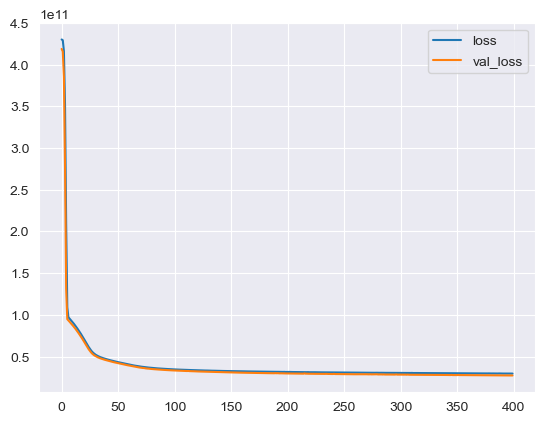

In [154]:
loss.plot()

We plotted our losses and we observe no overfitting (val_loss not overtaking loss during epochs). We also observe that both losses keep decreasing so we could have trained the data a bit more.

## Evaluation on the Test Data

In [155]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [156]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 2ms/step


In [157]:
mean_absolute_error(y_test, predictions)

102085.03605082947

In [158]:
np.sqrt(mean_squared_error(y_test, predictions))

165326.4807127945

In [159]:
df['price'].mean()

540296.5735055795

In [160]:
explained_variance_score(y_test, predictions)

0.7939232290411868

We see the mean price of our data is about 540k and our mean absolute error is about 100k. So the error is about 20% of the mean price, which is obviously not the best but not so bad also. We will plot to compare the predictions and the real prices along with a perfect prediction.

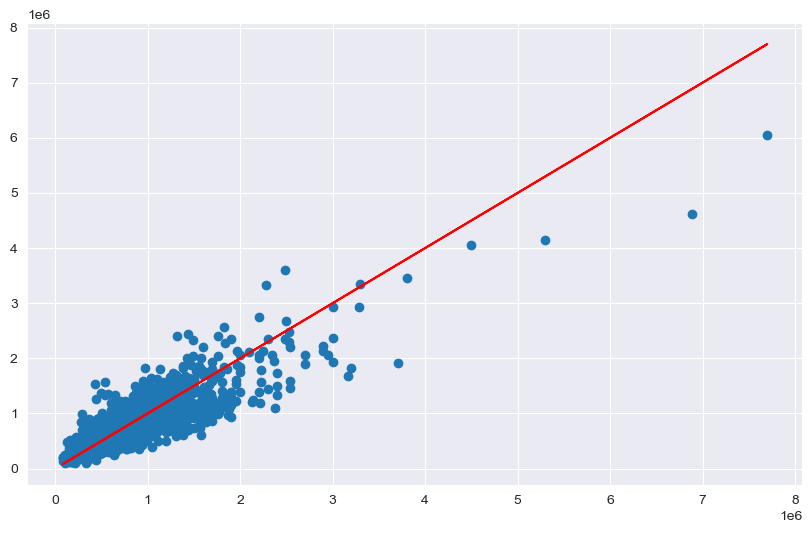

In [161]:
plt.figure(figsize= (10,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test, 'r')

Up to about 3 million we can see that the predictions are not far off. But these very expensive houses do tent to throw off our model. We could do the same as before and train the 99% of the dataset and use our model to predict houses up to about 3 million.

### Predicting a brand new house

In [162]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [169]:
single_house = df.drop('price',axis=1).iloc[0]

In [171]:
single_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [172]:
single_house= scaler.transform(single_house.values.reshape(-1,19))

In [173]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.        , 0.81818182]])

In [174]:
model.predict(single_house, verbose= 0)

array([[283041.]], dtype=float32)

In [175]:
df['price'].iloc[0]

221900.0

So here we observe a difference around 60k between the prediction and the real price.